In [1]:
import tensorflow as tf
from tensorflow import  keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

2022-08-19 16:40:52.607498: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-19 16:40:52.610180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-19 16:40:52.610187: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dt = pd.read_csv("diabetics_data.csv")
dt.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
dt

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
dt.isnull().sum()*100/len(dt)

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [4]:
freq = []
for x in range(0,31):
    freq.append(len(dt.iloc[:,x].value_counts()))

data_frequency = pd.DataFrame({'column_name': dt.columns,
                                 'frequency': freq})
print(data_frequency)

                column_name  frequency
0                 diagnosis          2
1               radius_mean        456
2              texture_mean        479
3            perimeter_mean        522
4                 area_mean        539
5           smoothness_mean        474
6          compactness_mean        537
7            concavity_mean        537
8       concave points_mean        542
9             symmetry_mean        432
10   fractal_dimension_mean        499
11                radius_se        540
12               texture_se        519
13             perimeter_se        533
14                  area_se        528
15            smoothness_se        547
16           compactness_se        541
17             concavity_se        533
18        concave points_se        507
19              symmetry_se        498
20     fractal_dimension_se        545
21             radius_worst        457
22            texture_worst        511
23          perimeter_worst        514
24               area_wor

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

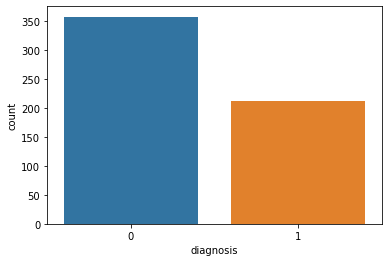

In [5]:
data = LabelEncoder()
dt.iloc[:,0] = data.fit_transform(dt.iloc[:,0])
sns.countplot("diagnosis", data=dt)

In [6]:
X = dt.iloc[:,1:]
Y = dt.iloc[:,0]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape = (30,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 100, batch_size=91)

Epoch 1/100


2022-08-19 16:40:53.988709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-19 16:40:53.988728: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-19 16:40:53.988751: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nsl50): /proc/driver/nvidia/version does not exist
2022-08-19 16:40:53.988919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5/5 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.6527
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.7297
Epoch 3/100
5/5 [==============================] - 0s 800us/step - loss: 0.4796 - accuracy: 0.7978
Epoch 4/100
5/5 [==============================] - 0s 968us/step - loss: 0.4351 - accuracy: 0.8681
Epoch 5/100
5/5 [==============================] - 0s 836us/step - loss: 0.3952 - accuracy: 0.9077
Epoch 6/100
5/5 [==============================] - 0s 741us/step - loss: 0.3599 - accuracy: 0.9165
Epoch 7/100
5/5 [==============================] - 0s 946us/step - loss: 0.3291 - accuracy: 0.9253
Epoch 8/100
5/5 [==============================] - 0s 824us/step - loss: 0.3008 - accuracy: 0.9297
Epoch 9/100
5/5 [==============================] - 0s 725us/step - loss: 0.2759 - accuracy: 0.9385
Epoch 10/100
5/5 [==============================] - 0s 815us/step - loss: 0.2531 - accuracy: 0.9407
Epoch 11/100
5/5 [=======

5/5 [==============================] - 0s 661us/step - loss: 0.0226 - accuracy: 0.9934
Epoch 84/100
5/5 [==============================] - 0s 655us/step - loss: 0.0221 - accuracy: 0.9934
Epoch 85/100
5/5 [==============================] - 0s 735us/step - loss: 0.0219 - accuracy: 0.9934
Epoch 86/100
5/5 [==============================] - 0s 746us/step - loss: 0.0211 - accuracy: 0.9956
Epoch 87/100
5/5 [==============================] - 0s 707us/step - loss: 0.0206 - accuracy: 0.9956
Epoch 88/100
5/5 [==============================] - 0s 866us/step - loss: 0.0201 - accuracy: 0.9956
Epoch 89/100
5/5 [==============================] - 0s 729us/step - loss: 0.0196 - accuracy: 0.9956
Epoch 90/100
5/5 [==============================] - 0s 685us/step - loss: 0.0191 - accuracy: 0.9956
Epoch 91/100
5/5 [==============================] - 0s 709us/step - loss: 0.0186 - accuracy: 0.9956
Epoch 92/100
5/5 [==============================] - 0s 895us/step - loss: 0.0182 - accuracy: 0.9956
Epoch 93/100


In [10]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9737


[0.0864478126168251, 0.9736841917037964]

In [11]:
predict = model.predict(x_test)
predict[:10]

4/4 [==============================] - 0s 717us/step


array([[2.5772296e-02],
       [9.9996364e-01],
       [9.9930173e-01],
       [4.1828530e-06],
       [1.8236737e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.5276999e-01],
       [3.6051896e-01],
       [1.6528222e-05]], dtype=float32)

In [12]:
y_test[:10]

204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64

In [13]:
y_pred = []
for element in predict:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

